In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import matplotlib.dates as mdates
import datetime as dt

# File to Load (Remember to Change These)
file1 = "./Unemployment_EW/Data/UnemploymentRate.csv"
file2 = "./Unemployment_EW/Data/TotalUnemployment.csv"
UnemploymentRate = pd.read_csv(file1)
TotalUnemployment = pd.read_csv(file2)
#UnemploymentRate.head()
#TotalUnemployment.head()


In [2]:
UnemploymentRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series ID  24 non-null     object 
 1   Date       24 non-null     object 
 2   Value      24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 704.0+ bytes


In [3]:
rate_df = pd.DataFrame(UnemploymentRate)
rate_df.head(5)                     

,Series ID,Date,Value
0,LAUCN290950000000003,2019-01-01,4.3
1,LAUCN290950000000003,2019-02-01,4.0
2,LAUCN290950000000003,2019-03-01,4.2
3,LAUCN290950000000003,2019-04-01,3.1
4,LAUCN290950000000003,2019-05-01,3.4


In [40]:
        # Average Unemployment in KC for 2019
top = rate_df.loc[0:11]
top

,Series ID,Date,Value
0,LAUCN290950000000003,2019-01-01,4.3
1,LAUCN290950000000003,2019-02-01,4.0
2,LAUCN290950000000003,2019-03-01,4.2
3,LAUCN290950000000003,2019-04-01,3.1
4,LAUCN290950000000003,2019-05-01,3.4
5,LAUCN290950000000003,2019-06-01,3.8
6,LAUCN290950000000003,2019-07-01,4.5
7,LAUCN290950000000003,2019-08-01,4.0
8,LAUCN290950000000003,2019-09-01,3.0
9,LAUCN290950000000003,2019-10-01,3.2


In [41]:
        # Average Unemployment rate in Kansas City in 2019
Tvalue = top['Value'].sum()
Avg_rate1 = Tvalue/12
#Avg_rate1 = Avg_rate1.map('{:.1f}%'.format)
print(f'Average unemployment rate in Kansas City for 2019 was {Avg_rate1}')

Average unemployment rate in Kansas City for 2019 was 3.716666666666667


<Figure size 432x288 with 0 Axes>

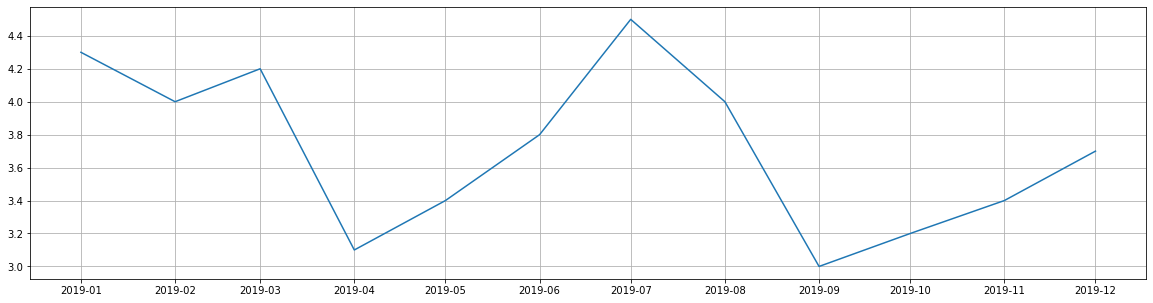

In [42]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(top['Date'], top['Value'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
plt.grid(True)
plt.show()

In [6]:
                # 2020 Unemployment rate information
bottom = rate_df.loc[12:23]
bottom

,Series ID,Date,Value
12,LAUCN290950000000003,2020-01-01,4.3
13,LAUCN290950000000003,2020-02-01,3.9
14,LAUCN290950000000003,2020-03-01,4.4
15,LAUCN290950000000003,2020-04-01,11.4
16,LAUCN290950000000003,2020-05-01,11.6
17,LAUCN290950000000003,2020-06-01,8.8
18,LAUCN290950000000003,2020-07-01,8.6
19,LAUCN290950000000003,2020-08-01,8.8
20,LAUCN290950000000003,2020-09-01,5.5
21,LAUCN290950000000003,2020-10-01,4.9


In [7]:
Bvalue = bottom['Value'].sum()
Bvalue

84.10000000000001

In [8]:
        # Average Unemployment rate in Kansas City in 2020
Bvalue = bottom['Value'].sum()
Avg_rate2 = Bvalue/12
#Avg_rate2 = Avg_rate2.map('{:.1f}%'.format)
print(f'Average unemployment rate in Kansas City for 2020 was {Avg_rate2}')

Average unemployment rate in Kansas City for 2020 was 7.008333333333334


In [ ]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(bottom['Date'],bottom['Value'])
ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
plt.grid(True)
plt.show()

In [9]:
        # Average Unemployment rate in KC in 2019 & 2020

In [11]:
by_year = UnemploymentRate.set_index("Date").groupby(["Date"])
by_year

In [23]:
pd.to_datetime(rate_df["Date"])

0    2019-01-01
1    2019-02-01
2    2019-03-01
3    2019-04-01
4    2019-05-01
5    2019-06-01
6    2019-07-01
7    2019-08-01
8    2019-09-01
9    2019-10-01
10   2019-11-01
11   2019-12-01
12   2020-01-01
13   2020-02-01
14   2020-03-01
15   2020-04-01
16   2020-05-01
17   2020-06-01
18   2020-07-01
19   2020-08-01
20   2020-09-01
21   2020-10-01
22   2020-11-01
23   2020-12-01
Name: Date, dtype: datetime64[ns]

In [27]:
rate_df ["Date"] = pd.to_datetime(rate_df["Date"])

In [33]:
before_df = rate_df[(rate_df['Date'] > '2020-01-1') & (rate_df['Date'] <= '2020-03-16')]
before_df

,Series ID,Date,Value
13,LAUCN290950000000003,2020-02-01,3.9
14,LAUCN290950000000003,2020-03-01,4.4


In [35]:
firstqtr_df = rate_df[(rate_df['Date'] >'2020-03-01') & (rate_df['Date'] <= '2020-06-30')]
firstqtr_df

,Series ID,Date,Value
15,LAUCN290950000000003,2020-04-01,11.4
16,LAUCN290950000000003,2020-05-01,11.6
17,LAUCN290950000000003,2020-06-01,8.8


<Figure size 432x288 with 0 Axes>

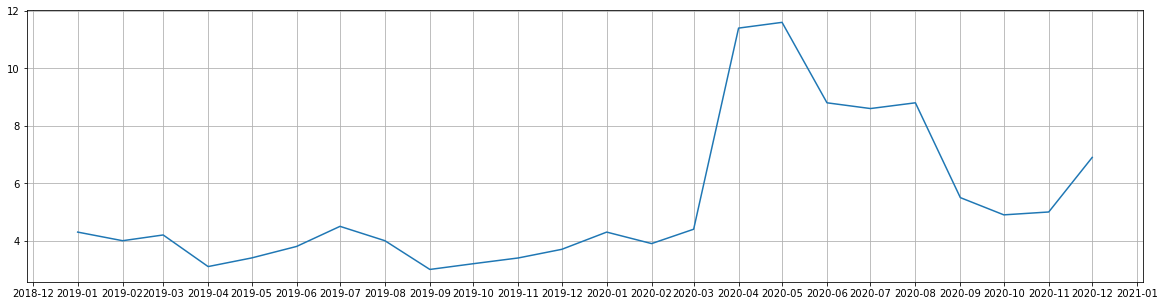

In [29]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(rate_df['Date'], rate_df['Value'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
plt.grid(True)
plt.show()

In [22]:
avg_rater = by_year['Value'].mean()
avg_rater

Date
2019-01-01     4.3
2019-02-01     4.0
2019-03-01     4.2
2019-04-01     3.1
2019-05-01     3.4
2019-06-01     3.8
2019-07-01     4.5
2019-08-01     4.0
2019-09-01     3.0
2019-10-01     3.2
2019-11-01     3.4
2019-12-01     3.7
2020-01-01     4.3
2020-02-01     3.9
2020-03-01     4.4
2020-04-01    11.4
2020-05-01    11.6
2020-06-01     8.8
2020-07-01     8.6
2020-08-01     8.8
2020-09-01     5.5
2020-10-01     4.9
2020-11-01     5.0
2020-12-01     6.9
Name: Value, dtype: float64

In [13]:
sum_df = pd.DataFrame({"Average Unemployment Rate": avg_rater})
sum_df = sum_df["Average Unemployment Rate"].map('{:.2f}%'.format)
sum_df

Date
2019-01-01     4.30%
2019-02-01     4.00%
2019-03-01     4.20%
2019-04-01     3.10%
2019-05-01     3.40%
2019-06-01     3.80%
2019-07-01     4.50%
2019-08-01     4.00%
2019-09-01     3.00%
2019-10-01     3.20%
2019-11-01     3.40%
2019-12-01     3.70%
2020-01-01     4.30%
2020-02-01     3.90%
2020-03-01     4.40%
2020-04-01    11.40%
2020-05-01    11.60%
2020-06-01     8.80%
2020-07-01     8.60%
2020-08-01     8.80%
2020-09-01     5.50%
2020-10-01     4.90%
2020-11-01     5.00%
2020-12-01     6.90%
Name: Average Unemployment Rate, dtype: object

In [21]:
print(sum_df).in

Date
2019-01-01     4.30%
2019-02-01     4.00%
2019-03-01     4.20%
2019-04-01     3.10%
2019-05-01     3.40%
2019-06-01     3.80%
2019-07-01     4.50%
2019-08-01     4.00%
2019-09-01     3.00%
2019-10-01     3.20%
2019-11-01     3.40%
2019-12-01     3.70%
2020-01-01     4.30%
2020-02-01     3.90%
2020-03-01     4.40%
2020-04-01    11.40%
2020-05-01    11.60%
2020-06-01     8.80%
2020-07-01     8.60%
2020-08-01     8.80%
2020-09-01     5.50%
2020-10-01     4.90%
2020-11-01     5.00%
2020-12-01     6.90%
Name: Average Unemployment Rate, dtype: object


In [19]:
#year_grouped = UnemploymentRate.groupby("Year")
#year_grouped.head()

In [20]:
#xvalue = year_grouped['Label']
#yvalue = year_grouped['Date']


In [338]:
#pd.to_datetime(year_grouped["Label"])

C:\Users\eweber\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ConversionError: Failed to convert value(s) to axis units: array([0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: Label, dtype: object,
       12    Jan
13    Feb
14    Mar
15    Apr
16    May
17    Jun
18    Jul
19    Aug
20    Sep
21    Oct
22    Nov
23    Dec
Name: Label, dtype: object], dtype=object)

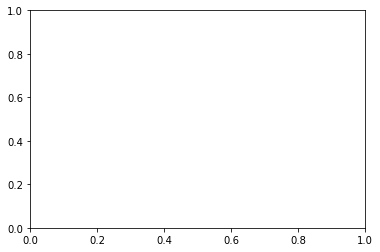

In [339]:
plt.plot(xvalue, yvalue)


In [320]:
#plt.plot(xvalue, yvalue)

In [258]:
year_max = year_grouped["Value"].max()
year_max = pd.DataFrame(label_max)
label_max

,Value
Label,
2019 Apr,3.1
2019 Aug,4.0
2019 Dec,3.7
2019 Feb,4.0
2019 Jan,4.3
2019 Jul,4.5
2019 Jun,3.8
2019 Mar,4.2
2019 May,3.4


In [311]:
#plt.plot(label_max['Label'], label_max['Value'])

In [ ]:
        # Total Unemployment in Kansas City in 2019 & 2020

In [239]:
total_yr = TotalUnemployment.set_index("Year").groupby(["Year"])
total_yr

In [242]:
TotalUnempAvg = total_yr['Value'].mean()
TotalUnempAvg

Year
2019    13530.500000
2020    25245.833333
Name: Value, dtype: float64

In [247]:
total_avg = pd.DataFrame({"Average Unemployed": TotalUnempAvg})
total_avg = total_avg["Average Unemployed"].map('{:.1f}'.format)
total_avg

Year
2019    13530.5
2020    25245.8
Name: Average Unemployed, dtype: object

In [248]:
        # By Label

In [253]:
label_grouped = UnemploymentRate.groupby("Label")
label_grouped

Label
2019 Apr     3.1
2019 Aug     4.0
2019 Dec     3.7
2019 Feb     4.0
2019 Jan     4.3
2019 Jul     4.5
2019 Jun     3.8
2019 Mar     4.2
2019 May     3.4
2019 Nov     3.4
2019 Oct     3.2
2019 Sep     3.0
2020 Apr    11.4
2020 Aug     8.8
2020 Dec     6.9
2020 Feb     3.9
2020 Jan     4.3
2020 Jul     8.6
2020 Jun     8.8
2020 Mar     4.4
2020 May    11.6
2020 Nov     5.0
2020 Oct     4.9
2020 Sep     5.5
Name: Value, dtype: float64